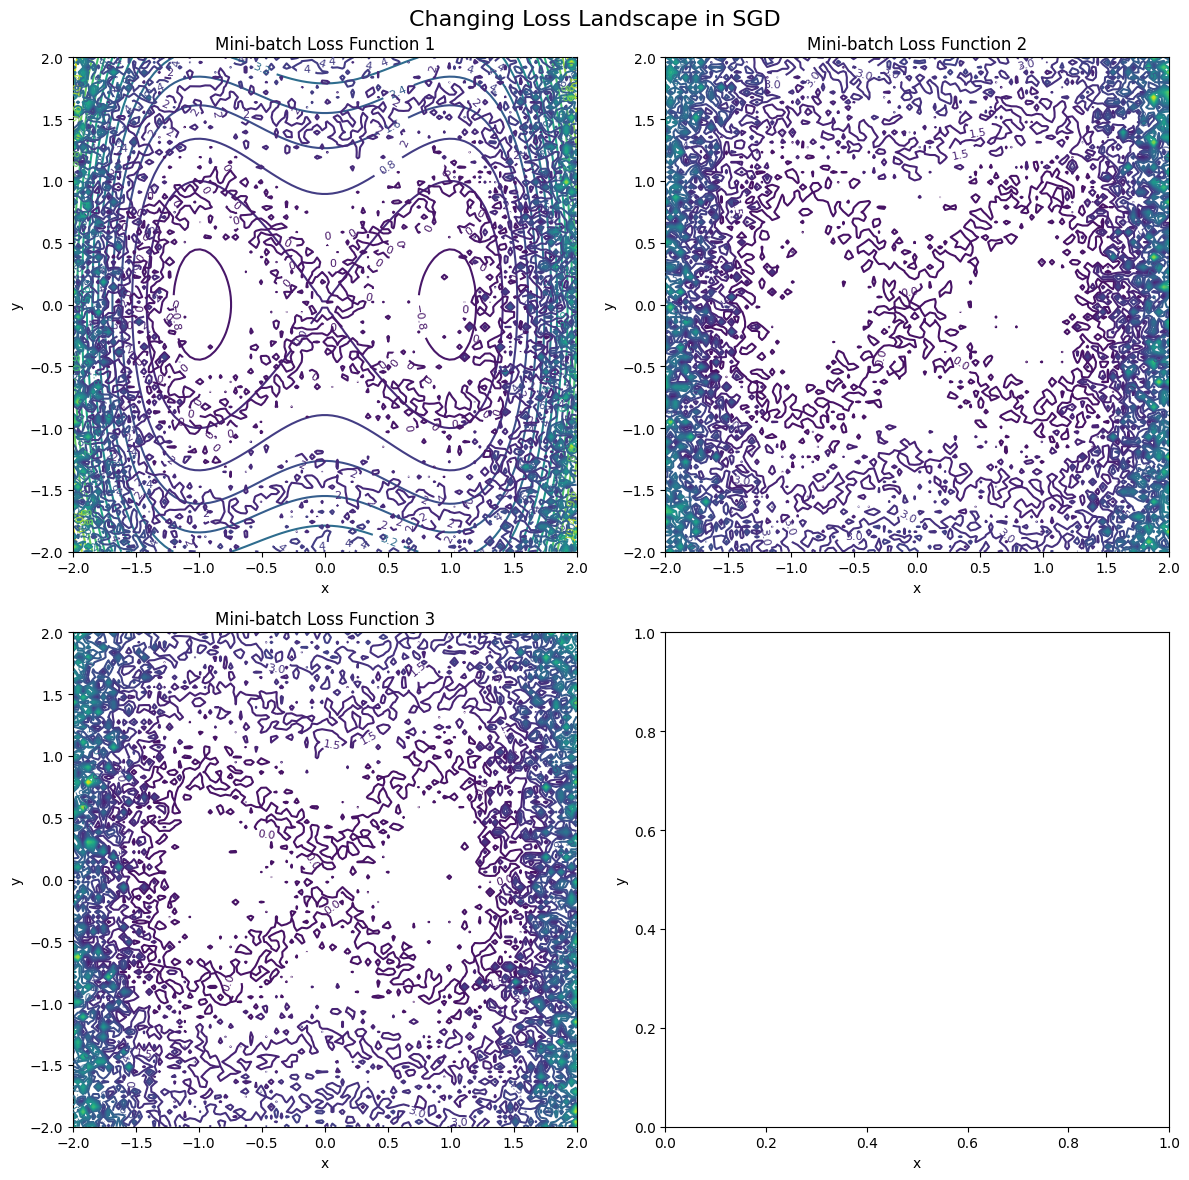

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def full_loss(x, y):
    return x**4 - 2*x**2 + y**2

def batch_loss(x, y, noise_level=0.2):
    # Simulate a mini-batch by adding noise to the full loss
    noise_x = np.random.normal(0, noise_level, x.shape)
    noise_y = np.random.normal(0, noise_level, y.shape)
    return full_loss(x + noise_x, y + noise_y)

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("Changing Loss Landscape in SGD", fontsize=16)

# Full loss
Z_full = full_loss(X, Y)
c1 = axs[0, 0].contour(X, Y, Z_full, levels=20)
axs[0, 0].clabel(c1, inline=True, fontsize=8)
axs[0, 0].set_title("Full Loss Function")

# Three different batch losses
for i in range(3):
    Z_batch = batch_loss(X, Y)
    ax = axs[i // 2, i % 2]
    c = ax.contour(X, Y, Z_batch, levels=20)
    ax.clabel(c, inline=True, fontsize=8)
    ax.set_title(f"Mini-batch Loss Function {i+1}")

for ax in axs.flat:
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()

C:\Users\91824\AppData\Local\Temp\ipykernel_2120\4145125613.py:43: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  return c2.collections


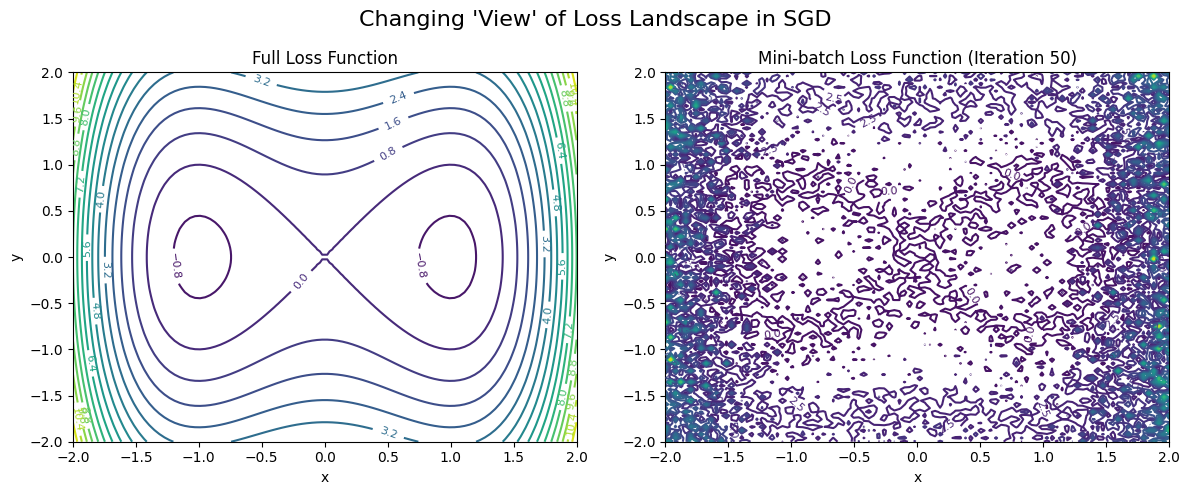

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def full_loss(x, y):
    return x**4 - 2*x**2 + y**2

def batch_loss(x, y, noise_level=0.3):
    noise_x = np.random.normal(0, noise_level, x.shape)
    noise_y = np.random.normal(0, noise_level, y.shape)
    return full_loss(x + noise_x, y + noise_y)

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Changing 'View' of Loss Landscape in SGD", fontsize=16)

# Full loss
Z_full = full_loss(X, Y)
c1 = ax1.contour(X, Y, Z_full, levels=20)
ax1.clabel(c1, inline=True, fontsize=8)
ax1.set_title("Full Loss Function")
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Mini-batch loss (will be updated in animation)
cont2 = ax2.contour(X, Y, Z_full, levels=20)  # Placeholder, will be updated
ax2.set_title("Mini-batch Loss Function")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Animation update function
def update(frame):
    ax2.clear()
    Z_batch = batch_loss(X, Y)
    c2 = ax2.contour(X, Y, Z_batch, levels=20)
    ax2.clabel(c2, inline=True, fontsize=8)
    ax2.set_title(f"Mini-batch Loss Function (Iteration {frame+1})")
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    return c2.collections

# Create animation
anim = FuncAnimation(fig, update, frames=50, interval=200, blit=False, repeat=True)

# Save animation as GIF (you may need to install imagemagick)
anim.save('sgd_changing_landscape.gif', writer='pillow', fps=5)

plt.tight_layout()
plt.show()